In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import math

In [ ]:
data = pd.read_csv(r'221.csv')
print(f"Number of rows in the dataset: {len(data)}")
data.head()

Number of rows in the dataset: 24999


RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    28    81   120    98  74     73        0
1    29    81   120    98  74     73        0
2    30    81   120    98  74     73        0
3    30    81   120    99  74     73        0
4    29    81   120    99  73     73        0

In [ ]:
min_values = data.select_dtypes(include=np.number).min()
max_values = data.select_dtypes(include=np.number).max()
mean_values = data.select_dtypes(include=np.number).mean()
median_values = data.select_dtypes(include=np.number).median()
stdev = data.select_dtypes(include=np.number).std()

print("Descriptive Statistics:")
print(data.describe())

print("\nMedian of the numeric columns:")
print(median_values)

print("\nMean of the numeric columns:")
print(mean_values)

print("\nStandard Deviation of the numeric columns:")
print(stdev)

Descriptive Statistics:
               RESP          BP-S          BP-D          SpO2            HR  \
count  24999.000000  24999.000000  24999.000000  24999.000000  24999.000000   
mean      23.763951     83.889756    121.411656     99.041282     88.562342   
std        4.492832      4.746617      8.966590      1.304528      9.592311   
min        0.000000     66.000000     88.000000      0.000000      0.000000   
25%       21.000000     81.000000    114.000000     98.000000     81.000000   
50%       23.000000     83.000000    121.000000     99.000000     88.000000   
75%       26.000000     87.000000    129.000000    100.000000     95.000000   
max       42.000000    127.000000    170.000000    100.000000    120.000000   

              PULSE       Anomaly  
count  24999.000000  24999.000000  
mean      87.975439      0.065683  
std        9.219837      0.247731  
min        0.000000      0.000000  
25%       81.000000      0.000000  
50%       88.000000      0.000000  
75%       95

In [ ]:
missing_data = data.isnull().sum()
columns_with_missing = missing_data[missing_data > 0]
print("Columns with missing values and their counts:\n", columns_with_missing)

rows_with_missing = data.isnull().any(axis=1).sum()
print(f"\nNumber of rows with missing values: {rows_with_missing}")

numeric_columns = data.select_dtypes(include='number')
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

print("\nMissing values in numeric columns have been imputed with the mean of the respective columns.")


Columns with missing values and their counts:
 Series([], dtype: int64)

Number of rows with missing values: 0

Missing values in numeric columns have been imputed with the mean of the respective columns.


In [ ]:
def plot_distribution_before_after(df, columns_with_missing):

    df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)

    for column in columns_with_missing.index:
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(df[column].dropna(), kde=True, color='skyblue')
        plt.title(f'{column} - Before Imputation')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        imputed_column = df[column].fillna(df[column].mean())

        plt.subplot(1, 2, 2)
        sns.histplot(imputed_column, kde=True, color='blue')
        plt.title(f'{column} - After Imputation')
        plt.xlabel(column)
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

missing_data = data.isnull().sum()
columns_with_missing = missing_data[missing_data > 0]
print("Columns with missing values and their counts:\n", columns_with_missing)

plot_distribution_before_after(data, columns_with_missing)

numeric_columns = data.select_dtypes(include='number')
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

print("\nMissing values in numeric columns have been imputed with the mean of the respective columns.")

data_with_outliers = pd.DataFrame(data)

Columns with missing values and their counts:
 Series([], dtype: int64)

Missing values in numeric columns have been imputed with the mean of the respective columns.


In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(data))
threshold = 4
data = data_with_outliers[(z_scores < threshold).all(axis=1)]

print(f"Original dataset size: {data_with_outliers.shape}")
print(f"Dataset size after removing outliers: {data.shape}")


Original dataset size: (24999, 7)
Dataset size after removing outliers: (24921, 7)


In [ ]:
X = data.drop('Anomaly', axis=1)
y = data['Anomaly']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Scikit-learn ID3): {accuracy}")
tree.plot_tree(clf, feature_names=X.columns, class_names=['0', '1'], filled=True)


Accuracy (Scikit-learn ID3): 0.9958539521198342


[Text(0.68325, 0.9791666666666666, 'HR <= 101.5\nentropy = 0.337\nsamples = 17444\nvalue = [16356, 1088]\nclass = 0'),
 Text(0.463, 0.9375, 'BP-D <= 134.5\nentropy = 0.107\nsamples = 15945\nvalue = [15719, 226]\nclass = 0'),
 Text(0.192, 0.8958333333333334, 'BP-D <= 106.5\nentropy = 0.072\nsamples = 15526\nvalue = [15392, 134]\nclass = 0'),
 Text(0.084, 0.8541666666666666, 'PULSE <= 90.0\nentropy = 0.992\nsamples = 87\nvalue = [39, 48]\nclass = 1'),
 Text(0.076, 0.8125, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0]\nclass = 0'),
 Text(0.092, 0.8125, 'PULSE <= 99.5\nentropy = 0.86\nsamples = 67\nvalue = [19, 48]\nclass = 1'),
 Text(0.048, 0.7708333333333334, 'RESP <= 22.5\nentropy = 0.971\nsamples = 45\nvalue = [18, 27]\nclass = 1'),
 Text(0.016, 0.7291666666666666, 'BP-S <= 76.5\nentropy = 0.469\nsamples = 10\nvalue = [9, 1]\nclass = 0'),
 Text(0.008, 0.6875, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = 0'),
 Text(0.024, 0.6875, 'HR <= 98.5\nentropy = 0.811\nsamples = 4\nvalue 

In [ ]:
def entropy(y):
    values, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

In [ ]:
def info_gain(X_col, y):

    parent_entropy = entropy(y)

    values, counts = np.unique(X_col, return_counts=True)
    weighted_entropy = 0
    for val, count in zip(values, counts):
        subset_y = y[X_col == val]
        weighted_entropy += (count / len(y)) * entropy(subset_y)

    return parent_entropy - weighted_entropy

In [ ]:
def id3(X, y, features):

    #if all targets are the same, return the target
    if len(np.unique(y)) == 1:
        return np.unique(y)[0]

    #if no features are left, return the most common target
    if len(features) == 0:
        return np.bincount(y).argmax()

    #select the feature with the highest information gain
    gains = [info_gain(X[feature], y) for feature in features]
    best_feature_idx = np.argmax(gains)
    best_feature = features[best_feature_idx]

    #create the tree node with the best feature
    tree = {best_feature: {}}

    #split the dataset and recurse
    for value in np.unique(X[best_feature]):
        subset_X = X[X[best_feature] == value]
        subset_y = y[X[best_feature] == value]
        subtree = id3(subset_X, subset_y, [f for f in features if f != best_feature])
        tree[best_feature][value] = subtree

    return tree


In [ ]:
#call the custom ID3 algorithm
features = X.columns.tolist()
tree = id3(X_train, y_train, features)

print("Decision Tree (Custom ID3):")
print(tree)


Decision Tree (Custom ID3):
{'HR': {70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: {'PULSE': {72: 0, 74: 0, 75: 0, 77: {'BP-S': {83: 0, 93: 0, 94: 1}}, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0}}, 83: 0, 84: {'BP-D': {106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 119: 0, 120: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 1, 137: {'RESP': {23: 0, 24: 1, 26: 0}}}}, 85: 0, 86: {'BP-S': {74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: {'BP-D': {126: 0, 127: 0, 128: 0, 129: 0, 130: {'RESP': {20: 0, 23: {'PULSE': {85: 0, 86: {'SpO2': {100: 0}}}}, 24: 0, 25: 0, 26: 0, 28: 0}}, 131: {'RESP': {23: 1, 26: 0}}}}, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0}}, 87: {'BP-D': {105: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 127: 0, 128: 0, 129: 0, 130: 0, 13

In [ ]:
def predict(tree, sample):
    """Predict the class for a given sample using the custom ID3 tree"""
    if not isinstance(tree, dict):
        return tree  #if leaf node, return the class

    #get the first feature from the tree
    feature = next(iter(tree))
    value = sample[feature]

    #traverse the tree to the next node
    subtree = tree[feature].get(value, 0)
    return predict(subtree, sample)


In [ ]:
y_pred_sklearn = clf.predict(X_test)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
id3_f1 = f1_score(y_test, y_pred, average='binary')

y_pred_custom = X_test.apply(lambda x: predict(tree, x), axis=1)
accuracy_custom = accuracy_score(y_test, y_pred_custom)

print(f"Accuracy (Scikit-learn ID3): {accuracy_sklearn}")
print(f"Accuracy (Custom ID3): {accuracy_custom}")


Accuracy (Scikit-learn ID3): 0.9958539521198342
Accuracy (Custom ID3): 0.9843520128393741


In [ ]:
import time

start_time = time.time()
clf.fit(X_train, y_train)
sklearn_time = time.time() - start_time
print(f"Time taken (Scikit-learn): {sklearn_time:.4f} seconds")

start_time = time.time()
tree = id3(X_train, y_train, X.columns.tolist())
custom_time = time.time() - start_time
print(f"Time taken (Custom ID3): {custom_time:.4f} seconds")


Time taken (Scikit-learn): 0.0291 seconds
Time taken (Custom ID3): 2.1709 seconds


In [ ]:
data = pd.read_csv(r'230.csv')
print(f"Number of rows in the dataset: {len(data)}")
data.head()

Number of rows in the dataset: 25000


RESP  BP-S  BP-D  SpO2  HR  PULSE  Anomaly
0    15    54    73    97  72     71        0
1    15    54    73    97  72     71        0
2    15    54    73    97  72     71        0
3    15    54    73    97  72     71        0
4    15    55    74    97  72     71        0

In [ ]:
min_values = data.select_dtypes(include=np.number).min()
max_values = data.select_dtypes(include=np.number).max()
mean_values = data.select_dtypes(include=np.number).mean()
median_values = data.select_dtypes(include=np.number).median()
stdev = data.select_dtypes(include=np.number).std()

print("Descriptive Statistics:")
print(data.describe())

print("\nMedian of the numeric columns:")
print(median_values)

print("\nMean of the numeric columns:")
print(mean_values)

print("\nStandard Deviation of the numeric columns:")
print(stdev)

Descriptive Statistics:
               RESP          BP-S          BP-D          SpO2            HR  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean      17.621400     53.966440     73.920600     94.526280     77.004120   
std        3.560338      7.752623     10.038658      2.137993      6.611137   
min        0.000000     37.000000     52.000000     81.000000      0.000000   
25%       15.000000     50.000000     67.000000     93.000000     73.000000   
50%       17.000000     54.000000     73.000000     94.000000     76.000000   
75%       20.000000     60.000000     82.000000     96.000000     79.000000   
max       42.000000    211.000000    217.000000     99.000000    131.000000   

              PULSE       Anomaly  
count  25000.000000  25000.000000  
mean      76.180320      0.031480  
std        5.954691      0.174615  
min       54.000000      0.000000  
25%       72.000000      0.000000  
50%       75.000000      0.000000  
75%       79

In [ ]:
missing_data = data.isnull().sum()
columns_with_missing = missing_data[missing_data > 0]
print("Columns with missing values and their counts:\n", columns_with_missing)

rows_with_missing = data.isnull().any(axis=1).sum()
print(f"\nNumber of rows with missing values: {rows_with_missing}")

numeric_columns = data.select_dtypes(include='number')
data[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.mean())

print("\nMissing values in numeric columns have been imputed with the mean of the respective columns.")

Columns with missing values and their counts:
 Series([], dtype: int64)

Number of rows with missing values: 0

Missing values in numeric columns have been imputed with the mean of the respective columns.


In [ ]:
from scipy import stats

z_scores = np.abs(stats.zscore(data))
threshold = 4
data = data_with_outliers[(z_scores < threshold).all(axis=1)]

print(f"Original dataset size: {data_with_outliers.shape}")
print(f"Dataset size after removing outliers: {data.shape}")


Original dataset size: (24999, 7)
Dataset size after removing outliers: (23906, 7)


<ipython-input-37-aa3f600c2605>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data_with_outliers[(z_scores < threshold).all(axis=1)]


In [ ]:
X = data.drop('Anomaly', axis=1)
y = data['Anomaly']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#initialize the model
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

y_pred_sklearn = dtc.predict(X_test)

#performace
print("Scikit-Learn DecisionTreeClassifier Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_sklearn)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_sklearn))


Scikit-Learn DecisionTreeClassifier Performance:
Accuracy: 0.9954666666666667
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7257
           1       0.94      0.92      0.93       243

    accuracy                           1.00      7500
   macro avg       0.97      0.96      0.96      7500
weighted avg       1.00      1.00      1.00      7500



In [ ]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

#prepare data
train_data = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, y_train], axis=1), label="Anomaly")
test_data = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, y_test], axis=1), label="Anomaly")

#initialize
model = tfdf.keras.CartModel(task=tfdf.keras.Task.CLASSIFICATION)

model.fit(train_data)

predictions = model.predict(test_data)

#convert continuous predictions to binary class labels (for binary classification)
y_pred = [1 if pred[0] >= 0.5 else 0 for pred in predictions]

accuracy = accuracy_score(y_test, y_pred)
print("TensorFlow Decision Forests Performance:")
print(f"Accuracy: {accuracy}")

Use /tmp/tmp8vhzo2a8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.583778. Found 17500 examples.
Training model...
Model trained in 0:00:00.210131
Compiling model...
Model compiled.
8/8 [==============================] - 0s 16ms/step
TensorFlow Decision Forests Performance:
Accuracy: 0.9916
F1 Score: 0.8701030927835052


*ID3 is preferred for categorical data and can provide insightful splits based on information gain but can lead to overfitting.
CART is more flexible and manages both continuous and categorical data efficiently and leads to better generaliztion. pruining also helps to avoid overfitting and is more suited for large scale real world problems. Comparing the results for the two datasets above yeilds almost the level of accuracy of approximately 0.98-0.99.*

*ID3:
Information Gain is by Entropy calculation. No built-in Pruning, hence larger Trees created. Higher accuracy but prone to overfitting. Slightly slower.*

*CART:
Gini Impurity is calculated as split criterion. Pruning leads to smaller Trees. Great for generalizing larger datasets. Computationaly faster.*

In [ ]:
df = pd.read_csv(r'221.csv')
data = pd.DataFrame(df)

X = data.drop('Anomaly', axis=1)
y = data['Anomaly']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import tensorflow_decision_forests as tfdf
import tensorflow as tf
import pandas as pd
from sklearn.metrics import accuracy_score

train_data = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_train, y_train], axis=1), label="Anomaly")
test_data = tfdf.keras.pd_dataframe_to_tf_dataset(pd.concat([X_test, y_test], axis=1), label="Anomaly")

model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)

model.fit(train_data)

y_pred = model.predict(test_data)
y_pred = [int(pred[0] > 0.5) for pred in y_pred]  #converting prob to binary prediction

accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy}")

import matplotlib.pyplot as plt
tfdf.model_plotter.plot_model(model, tree_idx=0, max_depth=3)
plt.show()


Use /tmp/tmpqru3h1vy as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.528360. Found 17499 examples.
Training model...
Model trained in 0:00:07.861496
Compiling model...
Model compiled.
8/8 [==============================] - 1s 61ms/step
Random Forest Model Performance:
Accuracy: 0.9936


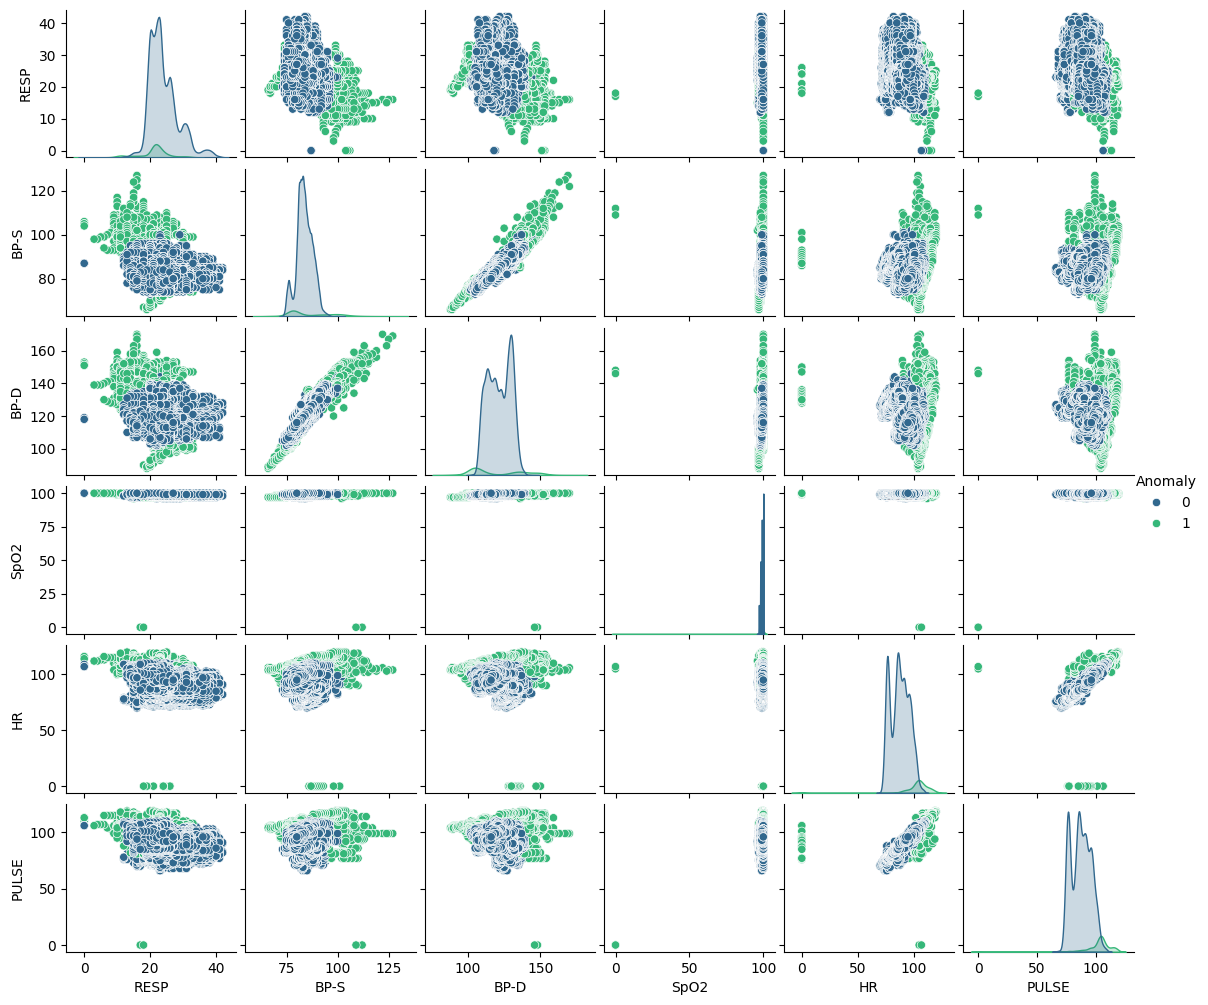

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

features = ['RESP', 'BP-S', 'BP-D', 'SpO2', 'HR', 'PULSE']
target = 'Anomaly'

pairplot = sns.pairplot(data, hue=target, palette='viridis', diag_kind='kde')

pairplot.fig.set_size_inches(12, 10)

plt.show()

In [ ]:
df = pd.read_csv(r'230.csv')
data = pd.DataFrame(df)

X = data.drop('Anomaly', axis=1)
y = data['Anomaly']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss

params = [
    {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
    {'n_estimators': 400, 'learning_rate': 0.02, 'max_depth': 7},
    {'n_estimators': 200, 'learning_rate': 1, 'max_depth': 5},
    {'n_estimators': 50, 'learning_rate': 0.2, 'max_depth': 2},
]

results = []

for param in params:
    model = GradientBoostingClassifier(**param)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba)

    results.append({
        'params': param,
        'accuracy': accuracy,
        'log_loss': logloss
    })

for result in results:
    print(f"Parameters: {result['params']}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Log Loss: {result['log_loss']:.4f}\n")

Parameters: {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3}
Accuracy: 0.9876
Log Loss: 0.0385

Parameters: {'n_estimators': 400, 'learning_rate': 0.02, 'max_depth': 7}
Accuracy: 0.9969
Log Loss: 0.0113

Parameters: {'n_estimators': 200, 'learning_rate': 1, 'max_depth': 5}
Accuracy: 0.9928
Log Loss: 0.1278

Parameters: {'n_estimators': 50, 'learning_rate': 0.2, 'max_depth': 2}
Accuracy: 0.9801
Log Loss: 0.0575



In [ ]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

rf_train_accuracy = accuracy_score(y_train, rf_train_preds)
rf_test_accuracy = accuracy_score(y_test, rf_test_preds)
rf_train_log_loss = log_loss(y_train, rf_model.predict_proba(X_train))
rf_test_log_loss = log_loss(y_test, rf_model.predict_proba(X_test))

print("Random Forest Performance:")
print(f"Training Accuracy: {rf_train_accuracy:.4f}")
print(f"Test Accuracy: {rf_test_accuracy:.4f}")
print(f"Training Log Loss: {rf_train_log_loss:.4f}")
print(f"Test Log Loss: {rf_test_log_loss:.4f}")

Random Forest Performance:
Training Accuracy: 0.9993
Test Accuracy: 0.9968
Training Log Loss: 0.0029
Test Log Loss: 0.0169


In [ ]:
#train gbdt
gbdt_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt_model.fit(X_train, y_train)
=
gbdt_train_preds = gbdt_model.predict(X_train)
gbdt_test_preds = gbdt_model.predict(X_test)

gbdt_train_accuracy = accuracy_score(y_train, gbdt_train_preds)
gbdt_test_accuracy = accuracy_score(y_test, gbdt_test_preds)
gbdt_train_log_loss = log_loss(y_train, gbdt_model.predict_proba(X_train))
gbdt_test_log_loss = log_loss(y_test, gbdt_model.predict_proba(X_test))

print("Gradient Boosting Performance:")
print(f"Training Accuracy: {gbdt_train_accuracy:.4f}")
print(f"Test Accuracy: {gbdt_test_accuracy:.4f}")
print(f"Training Log Loss: {gbdt_train_log_loss:.4f}")
print(f"Test Log Loss: {gbdt_test_log_loss:.4f}")

Gradient Boosting Performance:
Training Accuracy: 0.9891
Test Accuracy: 0.9876
Training Log Loss: 0.0342
Test Log Loss: 0.0385


*Accuracy: Random Forest performs better in this case.
Disparity in Log Loss of training and testing data whilst using Random Forest conveys possible overfitting.
However, previous reulst of Graident Boosting using different paramters, suggests it's sensitiviy to the same, hence requiring careful tuning.*

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#feature importances
rf_importances = rf_model.feature_importances_
gbdt_importances = gbdt_model.feature_importances_

#creating df for easy plotting
features = X_train.columns
importances_df = pd.DataFrame({
    'Feature': features,
    'Random Forest': rf_importances,
    'GBDT': gbdt_importances
})

#sorting
importances_df = importances_df.sort_values(by='Random Forest', ascending=False)

#plot feature importances
plt.figure(figsize=(12, 8))

#random forest importances
plt.subplot(1, 2, 1)
sns.barplot(x='Random Forest', y='Feature', data=importances_df)
plt.title('Random Forest Feature Importances')

#gbdt importances
plt.subplot(1, 2, 2)
sns.barplot(x='GBDT', y='Feature', data=importances_df)
plt.title('Gradient Boosting Feature Importances')

plt.tight_layout()
plt.show()